# Clustering metric : 실루엣 지표(Dumn index)

- 실루엣 지표는 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지 표현
    * 실루엣 계수(coef값)을 기반으로 함.


- 군집간의 거리는 최대일수록, 군집내부간의 데이터들간의 거리가 가까울 수록 좋음.

- sklearn에서 제공하는 실루엣 API
    * silhouette_samples(X, labels, metric='거리공식', ..)
        - 모든 데이터포인트들 각각의 실루엣 계수를 계산해줌
        
    * silhouette_score(X, labels, metric='거리공식', ..)
        - 전체 데이터의 실루엣 계수값들의 평균값을 반환해줌.
        - -1~1 사이의 값으로 정규화해준 값임
        - 1로 갈수록 좋은 지표이지만 수치만 보고 좋다고 100%판단하면 안 됨. 왜냐하면 ``평균``값이기 때문. ``이상치에 민감하기 때문`` 즉, 개별 군집의 평균값으 ㅣ편차가 크지 않아야 함!

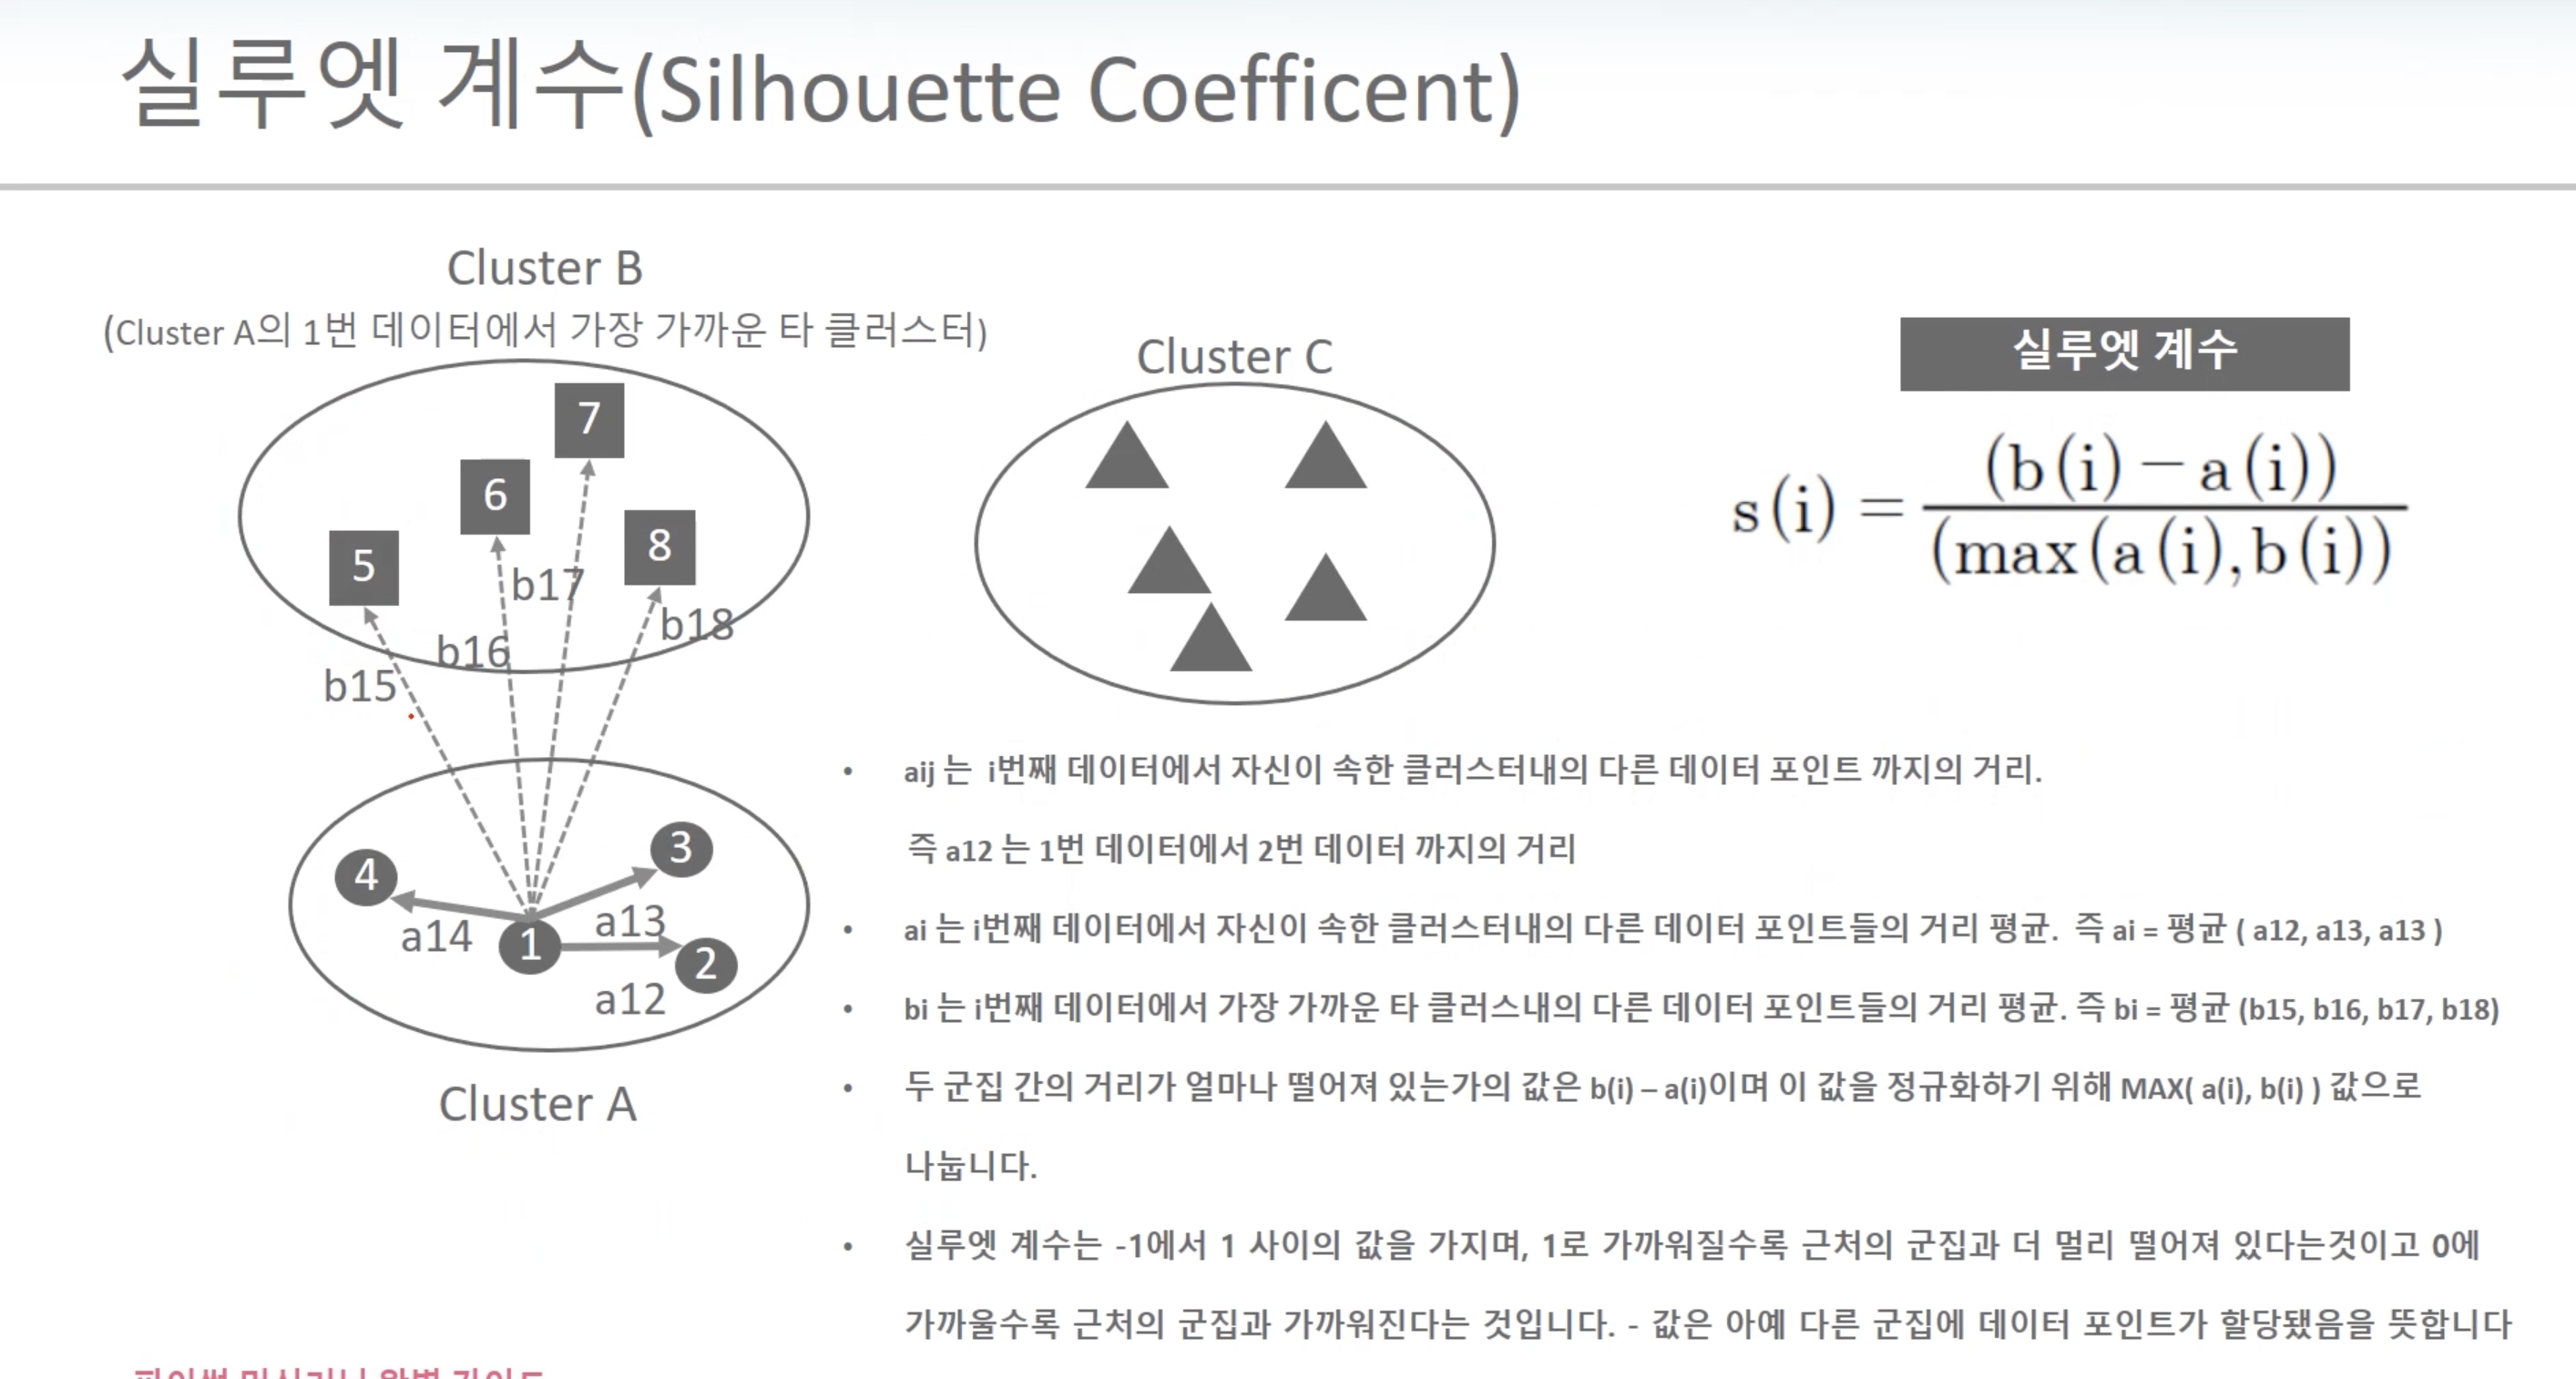

In [1]:
from IPython.display import Image
display(Image(filename='/Users/younghun/Desktop/inflearn강의자료/머신러닝강의/강의자료스샷/군집화/평가지표/실루엣지표계산과정.png'))

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
# fit함수의 labels_속성에 클러스터링된 값들 있음
kmeans = KMeans(n_clusters=3, init='k-means++',
               max_iter=300, random_state=42).fit(irisDF)

irisDF['cluster'] = kmeans.labels_
irisDF.head()


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
# 모든 데이터들의 실루엣 계수 계산 - sihoulette_samples함수 사용
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print(score_samples.shape)

# 각 데이터값들의 실루엣 계수 들어있는 변수 추가
irisDF['coeff'] = score_samples
irisDF.head()

(150,)


,sepal_length,sepal_width,petal_length,petal_width,cluster,coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [6]:
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(iris.data, irisDF['cluster'])
print(f'평균 실루엣 계수값: {average_coef:.4f}')

평균 실루엣 계수값: 0.5528


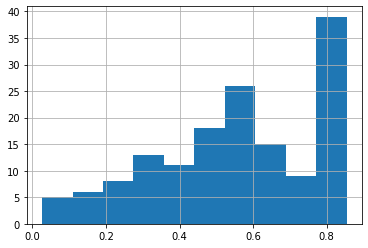

In [7]:
# 실루엣계수값들 분포살펴보기
irisDF['coeff'].hist()

In [8]:
# 클러스터별로 실루엣계수값 평균 값 출력
irisDF.groupby('cluster')['coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: coeff, dtype: float64

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score is : 0.43902711183132426


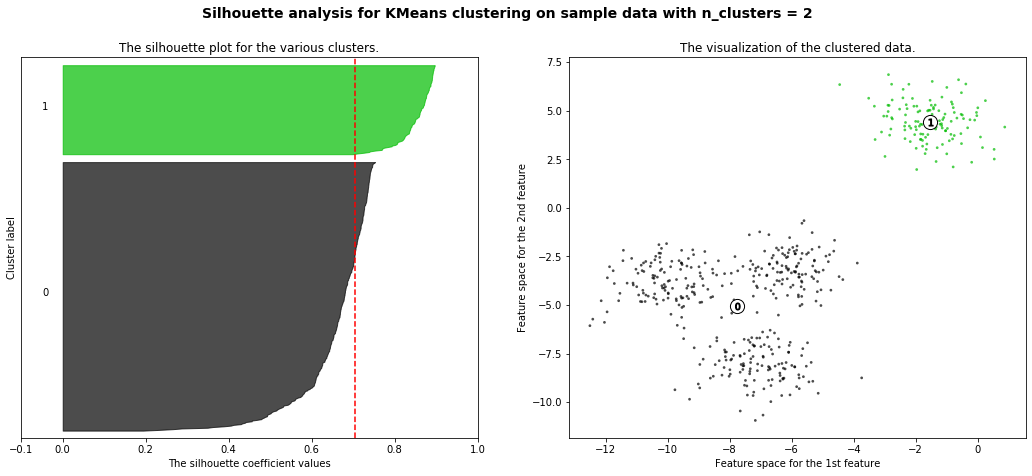

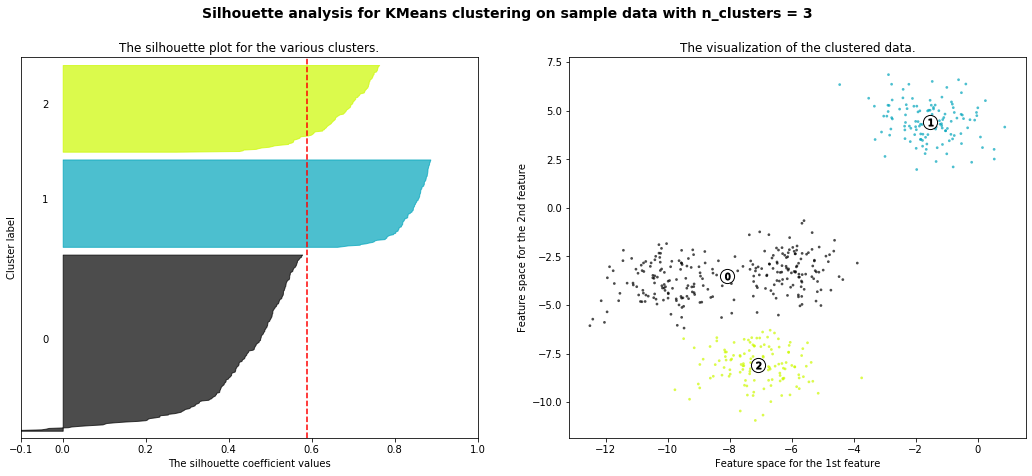

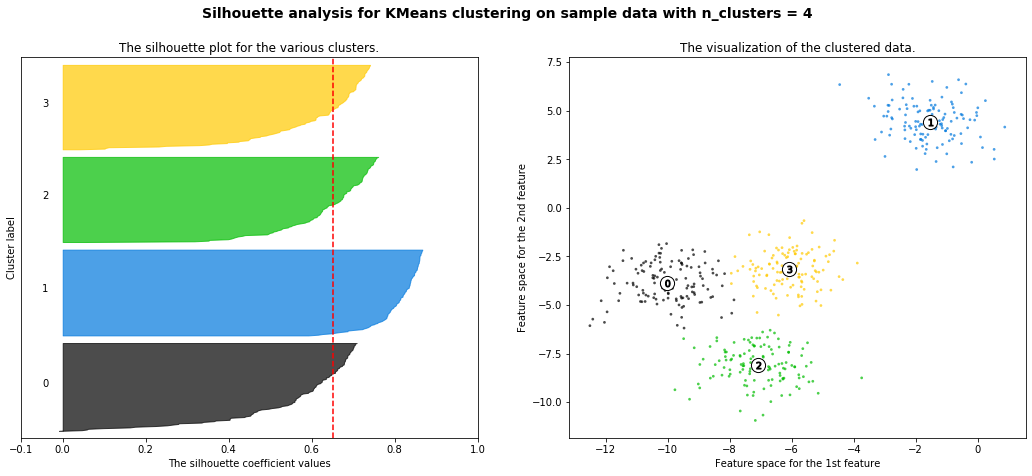

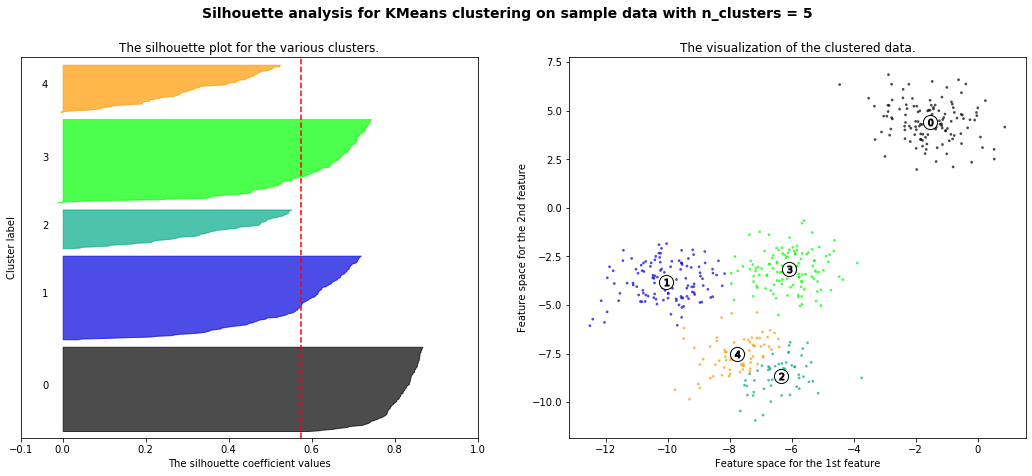

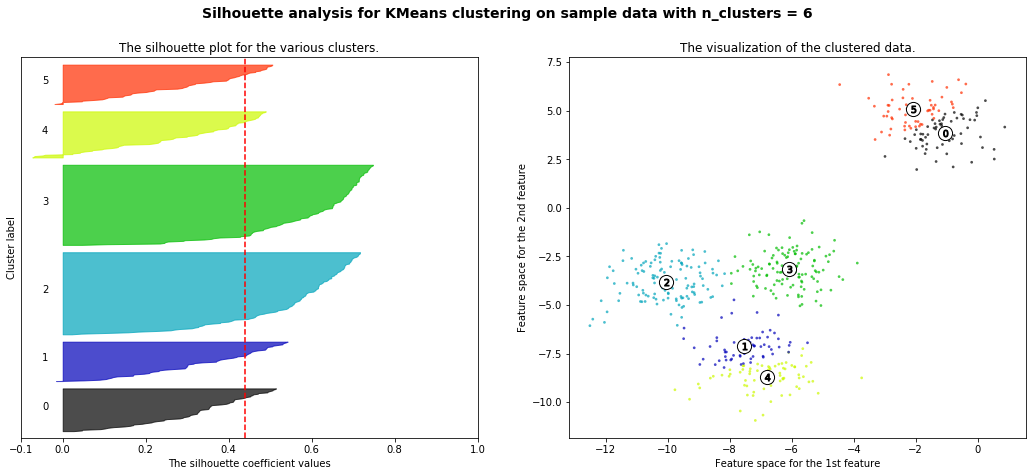

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()